In [2]:
import pandas as pd
import numpy as np
import warnings

In [3]:
# filter warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('online_retail.csv', encoding = 'ISO-8859-1')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum() # check for null values

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [7]:
# Select rows with missing Customer ID
missing_customer_id = df[df['Customer ID'].isnull()]

# Display rows with missing Customer ID
missing_customer_id.info()



<class 'pandas.core.frame.DataFrame'>
Index: 135080 entries, 622 to 541540
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      135080 non-null  object 
 1   StockCode    135080 non-null  object 
 2   Description  133626 non-null  object 
 3   Quantity     135080 non-null  int64  
 4   InvoiceDate  135080 non-null  object 
 5   Price        135080 non-null  float64
 6   Customer ID  0 non-null       float64
 7   Country      135080 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 9.3+ MB


In [8]:
missing_customer_id['Description'].isnull().sum() # Checking the number of missing values in the description column for the missing customer id rows

1454

### There are 1454 missing descriptions, that match the total number of missing descriptions in all the dataset.
### That indicates the missing descriptions occur only in the rows where Customer ID is missing too.

In [9]:
df = df.dropna(subset=['Customer ID']) # drop rows with missing Customer ID
df.isnull().sum() # check if there are any missing values left

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [10]:
# Convert Customer ID to int64
df['Customer ID'] = df['Customer ID'].astype('int64')

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.dtypes # check data types

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int64
Country                object
dtype: object

In [11]:
df.duplicated().sum() # check for duplicates

5225

In [12]:
df = df.drop_duplicates() # drop duplicates
df.duplicated().sum() # check if there are any duplicates left

0

In [13]:
unique_countries = df['Country'].unique() # get unique countries
unique_countries = pd.DataFrame(unique_countries).rename(columns={0:'Country'}) # display unique countries
unique_countries.sort_values(by='Country', ascending=True, inplace=True) # sort countries alphabetically
unique_countries

,Country
2,Australia
20,Austria
34,Bahrain
12,Belgium
31,Brazil
29,Canada
16,Channel Islands
18,Cyprus
28,Czech Republic
17,Denmark


### The countries appeared to be well recorded and there are no evident variations in the way they are written.

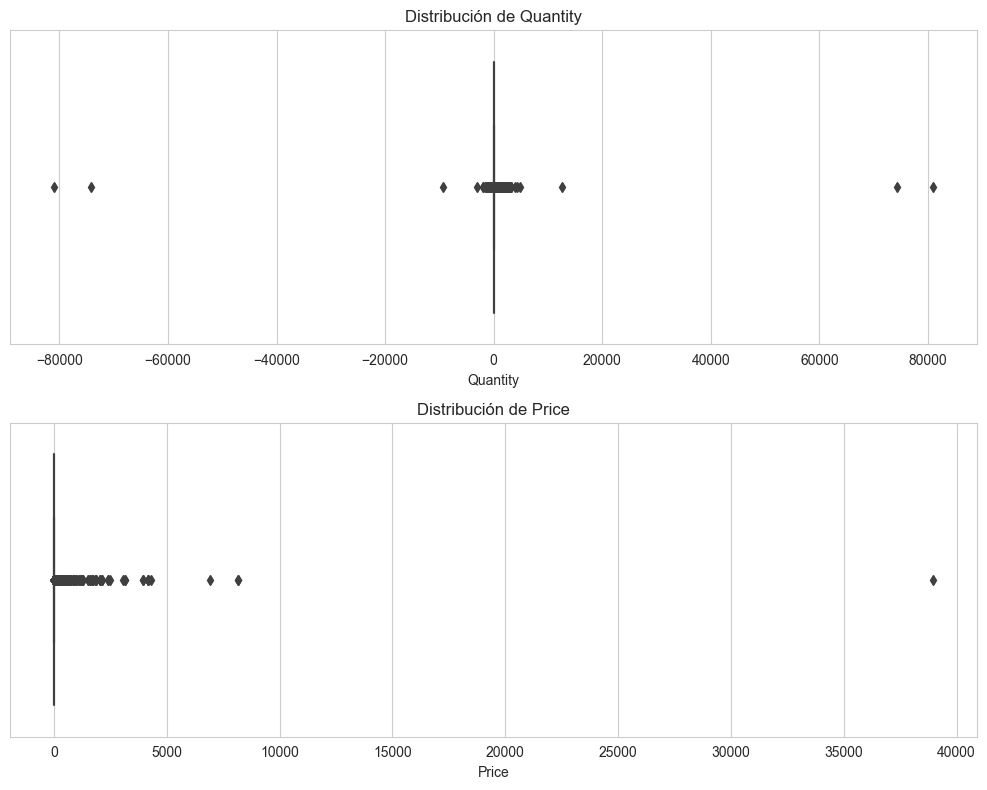

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Plot the Quantity column in the top subplot
sns.boxplot(x=df['Quantity'], ax=axes[0])
axes[0].set_title('Distribución de Quantity')

# Plot the Price column in the bottom subplot
sns.boxplot(x=df['Price'], ax=axes[1])
axes[1].set_title('Distribución de Price')

# Improve the spacing between the plots
plt.tight_layout()

# Display the plots
plt.show()


In [15]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,401605.000000,401605,401605.000000,401605.000000
mean,12.183245,2011-07-10 12:08:56.555570944,3.474100,15281.154341
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 12:00:00,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.282726,NaN,69.763952,1714.008869


In [16]:
# Filter all transactions for which Quantity is greater than 1000
high_quantity_transactions = df[df['Quantity'] > 1000]

# Filter all transactions for which Quantity is less than 0
negative_quantity_transactions = df[df['Quantity'] < 0]


In [17]:
high_quantity_transactions.sort_values(by='Quantity', ascending=False).head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308,United Kingdom


### It seems that the high quantity sales are explained by the low cost of it's products, it can be explained by wholesale purchases

In [18]:
negative_quantity_transactions.sort_values(by='Quantity', ascending=True).head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
4268,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749,United Kingdom
160143,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2011-04-18 13:08:00,2.55,15749,United Kingdom
224419,C556522,22920,HERB MARKER BASIL,-1515,2011-06-13 11:21:00,0.55,16938,United Kingdom
187609,C552995,M,Manual,-1350,2011-05-12 15:19:00,0.16,18133,United Kingdom
160142,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2011-04-18 13:08:00,2.55,15749,United Kingdom
390544,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029,United Kingdom


### Negative Quantity rows appears to be cancelled purchases.

In [19]:
df['Year'] = df['InvoiceDate'].dt.year # extract year from InvoiceDate
df['Month'] = df['InvoiceDate'].dt.month # extract month from InvoiceDate
df['Week'] = df['InvoiceDate'].dt.isocalendar().week # extract week from InvoiceDate
df['Time'] = df['InvoiceDate'].dt.time # extract time from InvoiceDate

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Week,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,48,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,48,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,48,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,48,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,48,08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,2010,12,48,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,2010,12,48,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010,12,48,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,2010,12,48,08:28:00
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,2010,12,48,08:34:00


In [24]:
# Numeric fields correlation with corr method

numeric_df = df.drop(['Week'], axis=1).select_dtypes(include=np.number) # select numeric columns 

correlation_matrix = numeric_df.corr() # calculate correlation
correlation_matrix

,Quantity,Price,Customer ID,Year,Month
Quantity,1.000000,-0.001243,-0.003456,0.001041,-0.002354
Price,-0.001243,1.000000,-0.004525,0.000978,-0.003139
Customer ID,-0.003456,-0.004525,1.000000,-0.035280,0.029850
Year,0.001041,0.000978,-0.035280,1.000000,-0.341558
Month,-0.002354,-0.003139,0.029850,-0.341558,1.000000


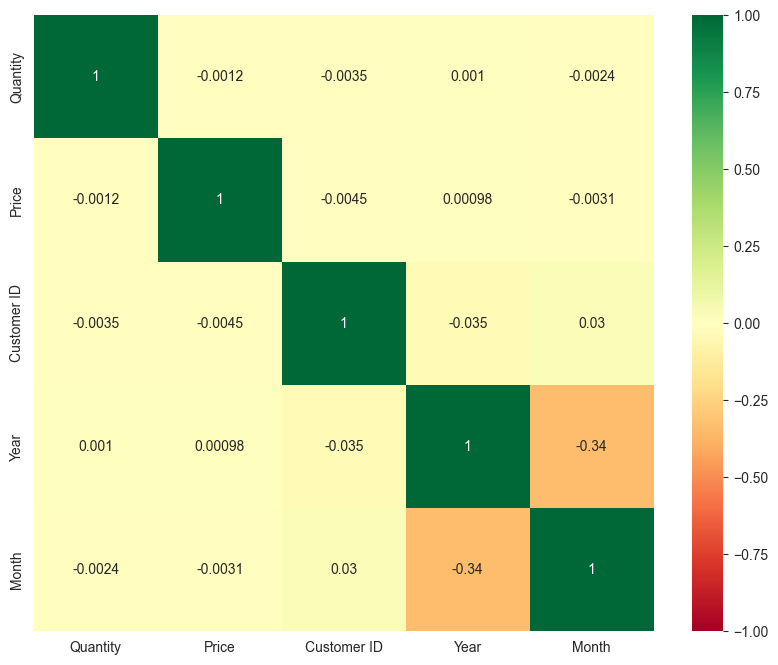

In [26]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

# Mostrar el gráfico
plt.show()


## At least for the numerical variables there is no clear correlation, we will continue exploring in tableau for the other variables

In [20]:
# Uncomment to save the cleaned data to excel file

#df.to_excel('online_retail_clean.xlsx', index=False) # save cleaned data to excel file